### Getting the data

In [3]:
import urllib.request

url = "https://ftp.1000genomes.ebi.ac.uk/vol1/ftp/phase3/data/NA18489/sequence_read/SRR003265.filt.fastq.gz"
filename = "SRR003265.filt.fastq.gz"

urllib.request.urlretrieve(url, filename)

print("Download complete:", filename)

Download complete: SRR003265.filt.fastq.gz


### Reading FASTQ files

In [4]:

from collections import defaultdict
import gzip

%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

from Bio import SeqIO

recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
rec = next(recs)
print(rec)
print(rec.id, rec.description, rec.seq)
print(rec.letter_annotations) # quality scores of our reads, per letter

ID: SRR003265.31
Name: SRR003265.31
Description: SRR003265.31 3042NAAXX:3:1:1252:1819 length=51
Number of features: 0
Per letter annotation for: phred_quality
Seq('GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA')
SRR003265.31 SRR003265.31 3042NAAXX:3:1:1252:1819 length=51 GGGAAAAGAAAAACAAACAAACAAAAACAAAACACAGAAACAAAAAAACCA
{'phred_quality': [40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 40, 30, 23, 40, 32, 35, 29, 40, 16, 40, 40, 32, 35, 31, 40, 40, 39, 22, 40, 24, 20, 28, 31, 12, 31, 10, 22, 28, 13, 26, 20, 23, 23]}


### Distribution of nucleotide reads

In [5]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
count = defaultdict(int)
for rec in recs:
    for letter in rec.seq:
        count[letter] += 1
total = sum(count.values())
for letter, count in count.items():
    print('%s: %.2f %d' % (letter, count/total*100, count))

G: 20.68 5359334
A: 28.60 7411965
C: 21.00 5444053
T: 29.58 7666885
N: 0.14 37289


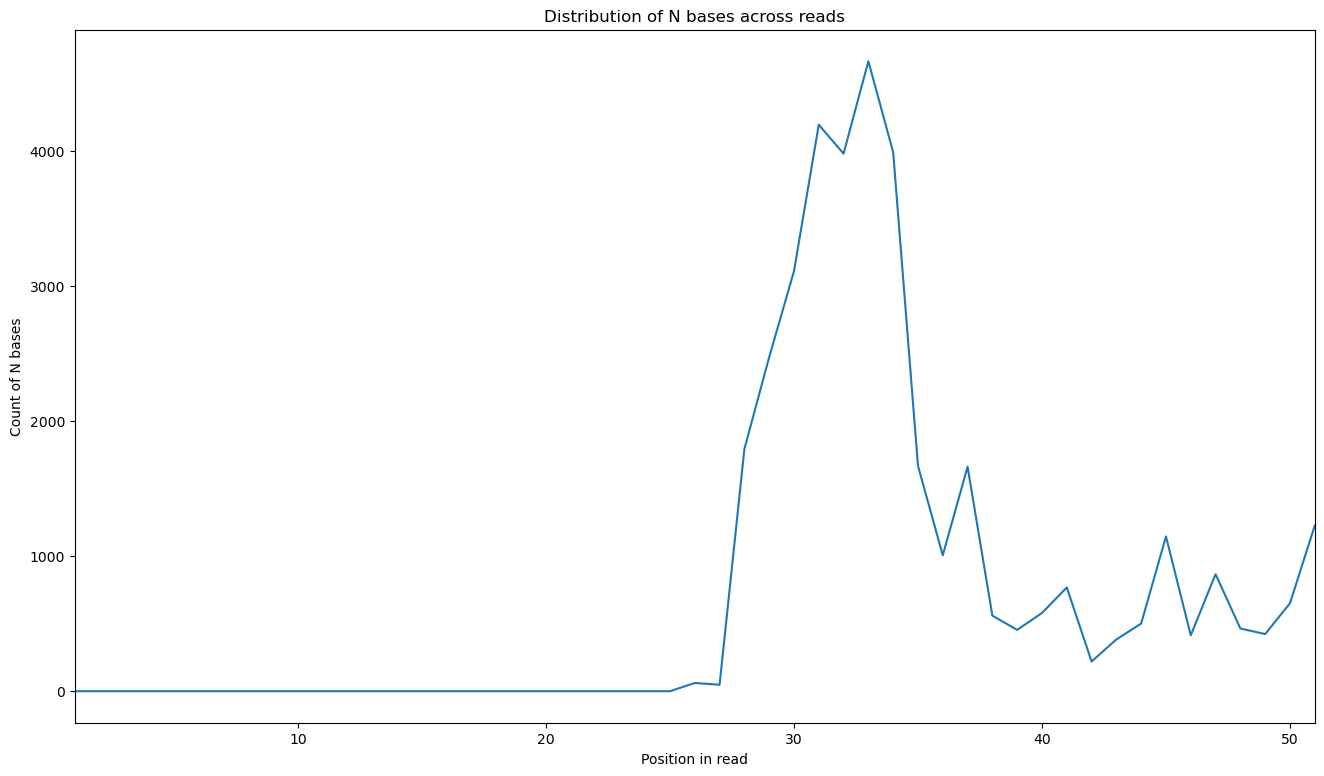

In [9]:
from collections import defaultdict
import gzip
from Bio import SeqIO
import matplotlib.pyplot as plt

# Parse FASTQ and count Ns
n_cnt = defaultdict(int)
with gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='UTF-8') as handle:
    for rec in SeqIO.parse(handle, 'fastq'):
        for i, letter in enumerate(rec.seq):
            if letter == 'N':
                n_cnt[i + 1] += 1

# Plot only once
seq_len = max(n_cnt.keys())
positions = range(1, seq_len + 1)

plt.figure(figsize=(16, 9))
plt.plot(positions, [n_cnt[x] for x in positions])
plt.xlim(1, seq_len)
plt.xlabel("Position in read")
plt.ylabel("Count of N bases")
plt.title("Distribution of N bases across reads")
plt.show()



In [10]:
recs = SeqIO.parse(gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8'), 'fastq')
cnt_qual = defaultdict(int)
for rec in recs:
    for i, qual in enumerate(rec.letter_annotations['phred_quality']):
        if i < 25:
            continue
        cnt_qual[qual] += 1
tot = sum(cnt_qual.values())
for qual, cnt in cnt_qual.items():
    print('%d: %.2f %d' % (qual, 100. * cnt / tot, cnt))

40: 22.76 3007221
16: 2.05 270431
32: 1.03 136763
35: 0.91 120704
31: 1.08 142464
39: 0.78 102568
22: 1.59 209905
24: 1.46 193259
20: 1.73 228923
28: 1.23 162226
12: 2.35 309918
10: 4.95 654154
13: 2.28 301033
26: 1.33 176263
23: 1.52 201164
37: 0.84 111179
34: 0.95 125624
21: 1.66 219602
30: 1.13 149449
33: 0.99 131291
25: 1.40 184846
17: 1.97 259779
38: 0.80 106290
4: 4.77 630923
36: 0.88 115701
18: 1.88 248982
11: 2.41 318303
19: 1.81 239621
5: 4.88 645266
9: 2.51 332259
3: 4.04 533458
27: 1.28 168902
8: 2.53 334410
29: 1.17 154892
15: 2.12 280719
7: 2.51 331743
2: 3.77 498679
14: 2.20 291341
6: 2.50 330834
1: 1.52 200558
0: 0.40 52229


C:\Users\SUMANT\AppData\Local\Temp\ipykernel_3788\2306061725.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(data=df, x="position", y="quality", palette= "viridis", fliersize=1)


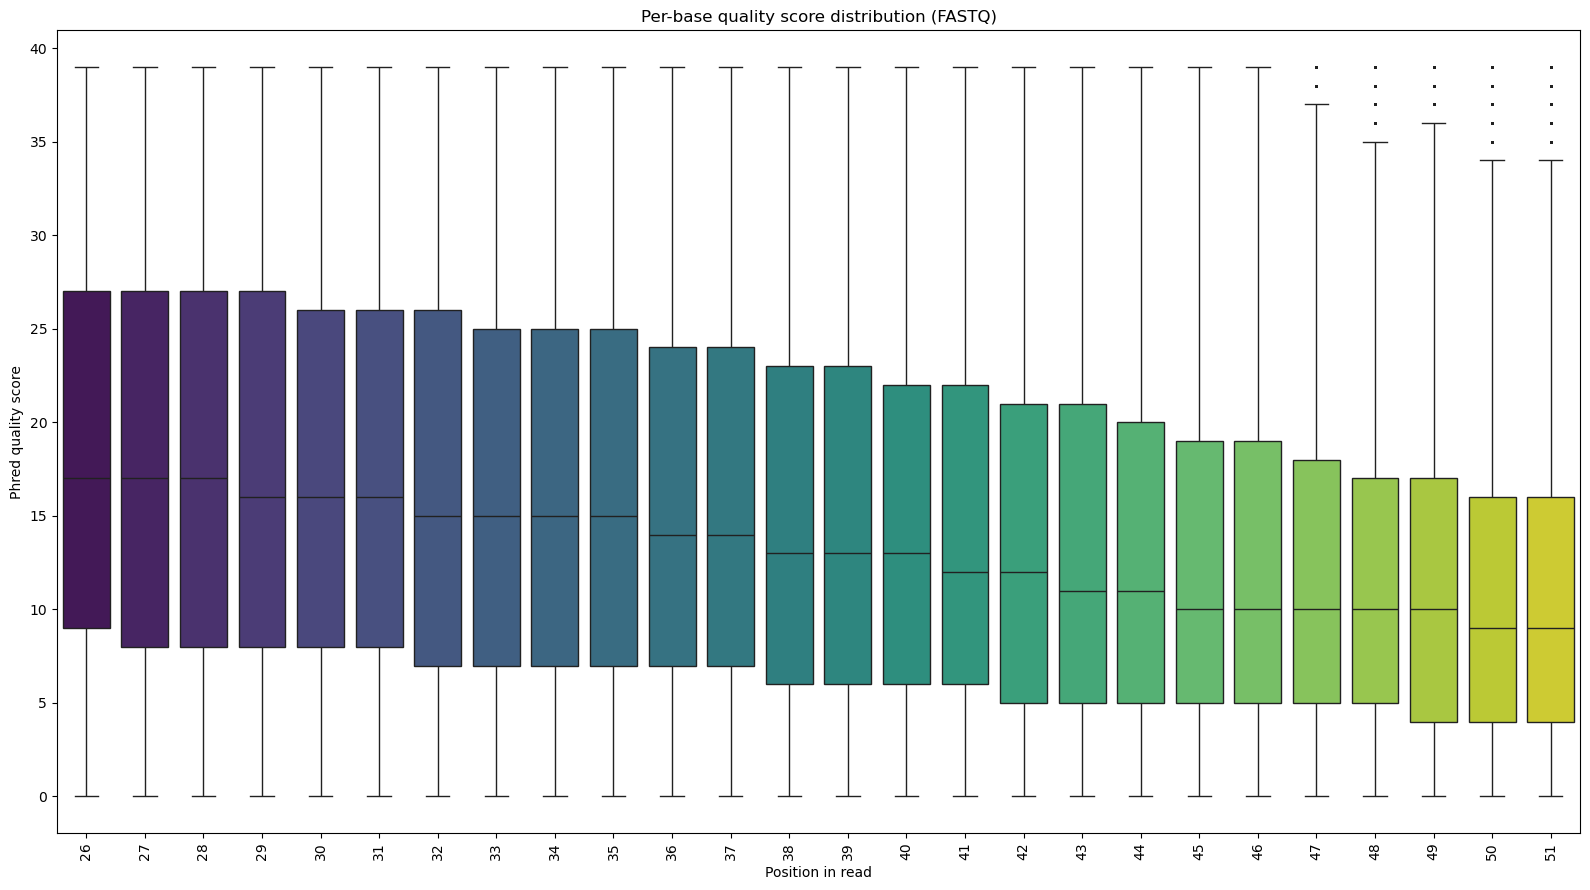

In [14]:
import pandas as pd

# Extract quality scores
qual_pos = defaultdict(list)
with gzip.open('SRR003265.filt.fastq.gz', 'rt', encoding='utf-8') as handle:
    for rec in SeqIO.parse(handle, 'fastq'):
        for i, qual in enumerate(rec.letter_annotations['phred_quality']):
            if i < 25 or qual == 40:  # skip first 25 bases + perfect scores
                continue
            qual_pos[i + 1].append(qual)

# Tidy dataframe
df = pd.DataFrame([
    {"position": pos, "quality": q}
    for pos, quals in qual_pos.items()
    for q in quals
])

# Plot once
plt.figure(figsize=(16, 9))
ax = sns.boxplot(data=df, x="position", y="quality", palette= "viridis", fliersize=1)
plt.xticks(rotation=90)
plt.xlabel("Position in read")
plt.ylabel("Phred quality score")
plt.title("Per-base quality score distribution (FASTQ)")
plt.tight_layout()
plt.show()